# CAPSTONE DATA SCIENCE PROJECT 
# Battle of the Neighborhoods - Final 

## Table of Contents

#### 1. Project Description
#### 2. Data Description 
#### 3. Data Acquisition
#### 4. Exploring Southwark Neigborhood
#### 5. Analyzing Each Neigborhood
#### 6. Cluster the Neigborhood
#### 7. Conclusion and Recommendation

# 1. Project Description 

 
## Introduction  

The Project is is a partial fulfillment of the Coursera IBM Data Science certification course. The project requirements are to leverage the “Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve.” My initial intention was to carry out a project on my city, Lusaka, Zambia. But I soon realized that acquiring the required data would be a challenge. Even the Foursquare API may have a limited applicability because the app may not be widely used in my city.  

I settled for the Greater  City of London because of some familiarity with the City and just the sheer  beauty of the City. In addition, the internet will have loads of data sources for one to carry out a rich Data Science Project. The approach taken in this project may be summarised as follows:
    * Retrieve a list of neighborhoods in London, 
    * Find the longitude and latitudes of the neighborhoods, 
    * Use the coordinates identified above as input in the Foursquare API, 
    * Use the Foursquare API to venue categories in each neighborhood 
    * Identify any other data such as crime reports, demographic reports and social economic report in the city of London 

An analysis of the data will be done, identifying suitable areas where an African restaurant may be established. ZLT will find the information in this report helpful in identifying best location for a restaurant. This information provided will of course be used in conjunction with other information such as financial and economic information that may be outside the scope of this research. 

## The case of an African Restaurant in London 

The management of ZLT Limited, believe there is room for a high-end African restaurant in London. The target market is not necessarily just African immigrants, although this is their main target market, but they believe there is a good number of none Africans who may find African cuisine exotic and an experience to have. A number of factors have convinced them that an African restaurant would be a viable business proposition. 

    * The population of London is changing rapidly, 
    * London has been a preferred destination for many foreigners, mostly seeking employment. 
    * Population projections are that London’s population will continue to grow quickly well into the middle of the century. 
    * There is a redistribution of population in London – shifting from one area to another. 
    
    
## Problem Identification 

We have been commissioned by ZLT Limited, a private consortium of companies, to recommend the best locations to establish an African Restaurant in the city of London. The management of ZLT has highlighted the following as their key success factors for establishing a restaurant: 

    * The Location of a restaurant must be in a popular place, 
    * The identified location must not be close to other African restaurants, 
    * The location must be near or close to African communities, 
    * The location must be in the most secure areas, 
    * The Location must be family friendly, 
    * Easy access to the location by public and private transport. 

The management of ZLT feel that while they appreciate London’s population growth, they do not understand enough to confidently help them establish a restaurant in the city. 

## About Greater London

This project is on the Greater London as opposed to City of London. To give us some understanding of the Greater London, I have copy pasted the following introduction on Greater London from Wikipedia. Please note that the City of London is part of the Greater London. My mandate is to find suitable locations in London rather than just the City of London.  

“Greater London is a ceremonial county of England that is located within the London region. This region forms the administrative boundaries of London and is organised into 33 local government districts—the 32 London boroughs and the City of London, which is located within the region but is separate from the county. The Greater London Authority, based in Southwark, is responsible for strategic local government across the region and consists of the Mayor of London and the London Assembly. The City of London Corporation is the principal local authority for the City of London, with a similar role to that of the 32 London borough councils. 

Administratively, Greater London was first established as a sui generis council area under the Greater London Council between 1963 and 1986. The county of Greater London was created on 1 April 1965 through the London Government Act 1963. The area was re-established as a region in 1994. The Greater London Authority was formed in 2000.[3][4][5] 

The region covers 1,572 km2 (607 sq mi) and had a population of 8,174,000 at the 2011 census.[6][7][8][9] The Greater London Built-up Area is used in some national statistics and is a measure of the continuous urban area and includes areas outside the administrative region.” https://en.wikipedia.org/wiki/Greater_London 

#  2. Data Description 

In this section, I describe the data that will be used in the project. The discussed data sources are not conclusive as during the course of the analysis some more data may be required. The list below, therefore only serves to give a rough estimate of the sources of data needed for this project. 

### Data Source 1 – Neighborhood Data 

The Greater London, which is the subject of this study rather than just the City of London, has 33 boroughs. We first need to obtain a list of all the locations or neighborhoods in London with their respective boroughs and post codes. This information is available on the following web address:  https://en.wikipedia.org/wiki/List_of_areas_of_London. 

### Data Source 2 – Employment and Ethnic Distribution

Data will be required on the rate of emplyment by ethnic group and also the population distribution in terms of race. This information would be required in order for us to know the areas have the most number of people of african descent. 

### Data Source 3 – Geographical Coordinates  

Geographical coordinates for each neighborhood will be obtained with the aid of GEOPY Library. Each postal code will be assigned a latitude and longitude coordinate.  

### Data Source 4 – Venue categories 

We will use the Foursquare API to retrieve venues, using the coordinates obtained in Data Source 3 above. We shall further obtain a list using Foursquare API for African Cuisine restaurants in London. 

#  3. Data Acquisition 

### importing dependencies needed for the analysis 

In [1]:
import requests 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from urllib.request import urlopen
import re


print('Libraries imported.')


Libraries imported.


## 3.1 Acquire Data

In [2]:
URL = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

df_list = []
# print(soup)
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data1 = data[0]
    data8 = data[8]    
    try:
        borough_name = data1.get_text()
        borough_name = borough_name[0]
        ll = data8.get_text()
        lat_long = ll[2]
        latitude = lat_long[0]
        longitude = lat_long[1]
#       Append the borough name, latitude and logitude in a list
        df_list.append((borough_name, latitude, longitude))
    except IndexError:pass

In [3]:
URL = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

df_list = []
# print(soup)
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data1 = data[0]
    data8 = data[8]    
    try:
        borough_name = data1.get_text()
        borough_name = borough_name.split('[')
        borough_name = borough_name[0]
        borough_name = borough_name.strip()
        
        ll = data8.get_text()
        ll = ll.split('/')
        lat_long = ll[2]
        lat_long = lat_long.split('(')
        lat_long = lat_long[0]
        lat_long = lat_long.split(';')
        latitude = lat_long[0]
        latitude = latitude.strip()
        longitude = lat_long[1]
        longitude = longitude.strip()
        longitude = longitude.replace(u'\ufeff', '')
        latitude = float(latitude)
        longitude = float(longitude)

#       Append the borough name, latitude and logitude in a list
        df_list.append((borough_name, latitude, longitude))
    except IndexError:pass

In [4]:
df_boroughs = pd.DataFrame(df_list, columns=['Borough','Latitude' , 'Longitude'])

In [5]:
df_boroughs.shape

(32, 3)

In [6]:
df_boroughs.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [7]:
import folium 

# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_boroughs['Latitude'], df_boroughs['Longitude'], df_boroughs['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='brown',
fill_opacity=0.7).add_to(map_london)  
map_london

### Additional Data


Ethnic distribution in London Boroughs. This data has been obtained from:https://beta.ukdataservice.ac.uk/datacatalogue/series/series?id=200002

In [8]:
df_race=pd.read_excel("ethnic_groups__by_borough_2017.xls")

In [9]:
df_race.head()


,Borough,White,Asian,Black,Mixed,Total
0,City of London,-,-,-,-,-
1,Barking and Dagenham,104000,48000,41000,17000,210000
2,Barnet,268000,58000,14000,50000,390000
3,Bexley,196000,16000,27000,8000,247000
4,Brent,124000,103000,62000,44000,332000


In [10]:
df_race.drop(df_race.index[:1], inplace=True)
df_race.head()

,Borough,White,Asian,Black,Mixed,Total
1,Barking and Dagenham,104000,48000,41000,17000,210000
2,Barnet,268000,58000,14000,50000,390000
3,Bexley,196000,16000,27000,8000,247000
4,Brent,124000,103000,62000,44000,332000
5,Bromley,258000,26000,18000,27000,329000


In [11]:
df_race.drop(df_race.index[32], inplace=True)
df_race.head()

,Borough,White,Asian,Black,Mixed,Total
1,Barking and Dagenham,104000,48000,41000,17000,210000
2,Barnet,268000,58000,14000,50000,390000
3,Bexley,196000,16000,27000,8000,247000
4,Brent,124000,103000,62000,44000,332000
5,Bromley,258000,26000,18000,27000,329000


In [12]:
df_race.drop(['White','Asian','Mixed','Total'], axis = 1, inplace = True)

In [13]:
df_race.head()

,Borough,Black
1,Barking and Dagenham,41000
2,Barnet,14000
3,Bexley,27000
4,Brent,62000
5,Bromley,18000


In [14]:
df_race.shape

(32, 2)

####  Sorting London boroughs by population of African Descent 

In [15]:
## Top 10 Boroughs in London by population of residents of African Descent
df_race.sort_values(by=['Black'], inplace=True, ascending=False)
df_race.head(10)

,Borough,Black
27,Southwark,71000
7,Croydon,70000
21,Lambeth,67000
22,Lewisham,63000
4,Brent,62000
10,Greenwich,59000
24,Newham,56000
11,Hackney,48000
9,Enfield,47000
30,Waltham Forest,45000


Emplyment Rate among Minorities in London Boroughs 

In [16]:
df_emplRate=pd.read_excel("Minority_Employment-rate_London_Boroughs_2017.xlsx")

In [17]:
df_emplRate.head()

,Borough,Rate
1,Barking and Dagenham,0.664587
2,Barnet,0.685637
3,Bexley,0.765823
4,Brent,0.635234
5,Bromley,0.746544


In [18]:
df_emplRate.sort_values(by=['Rate'], inplace=True, ascending=False)

In [19]:
df_emplRate.head(10)

,Borough,Rate
15,Havering,0.792208
3,Bexley,0.765823
22,Lewisham,0.762238
21,Lambeth,0.762029
5,Bromley,0.746544
23,Merton,0.742248
14,Harrow,0.737557
17,Hounslow,0.718569
16,Hillingdon,0.716172
28,Sutton,0.713924


In [20]:
## merging df_race and df-emplRate Dataframes and sorting order of Black Population in a Borough

In [21]:
df_data = pd.merge(df_race,df_emplRate,on='Borough')

In [22]:
df_data.head(10)

,Borough,Black,Rate
0,Southwark,71000,0.706081
1,Croydon,70000,0.699552
2,Lambeth,67000,0.762029
3,Lewisham,63000,0.762238
4,Brent,62000,0.635234
5,Greenwich,59000,0.674453
6,Newham,56000,0.600637
7,Hackney,48000,0.616279
8,Enfield,47000,0.676269
9,Waltham Forest,45000,0.640327


## Decision to focus on Southwalk Borough

ZLK Management is of the view that the population of residents of African descent is the number 1 criteria followed by economic activity. Economic activity has narrowly been decribed as to mean the level of employment of african or minority residents of an area.  In the situation where the two rankings are mutually exclusive the area with highest population will be chosen. Management whats to focus on a single Borough for anaysis. The borough of Southwalk has the highest ranking in terms of population and comes 12th in terms of employment rates for minorities. We have therefore chosen Southwalk and the area we could consider opening a restaurant.

In [23]:

from urllib.request import urlopen
import re
URL = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

codes = []
southwark_list = []
href_links_list = []
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data0 = data[0]
    area_name = data0.text

    data1 = data[1]
    data1 = data1.text
    borough = data1.split('[')
    borough_name = borough[0]
    data5 = data[5]
    code = data5.text
    code = code.strip()
    
    if borough_name == 'Southwark':
        codes.append(code)
        southwark_list.append((borough_name,area_name,code))

                
for link in soup.findAll('a', attrs={'href': re.compile("^https://tools.wmflabs.org")}):
            htext = link.text
            if htext in codes:
                hlink = link.get('href')
                href_links_list.append((htext, hlink))


In [24]:
df_southwark = pd.DataFrame(southwark_list, columns=['Borough', 'Area', 'Code'])

In [25]:
df_southwark

,Borough,Area,Code
0,Southwark,Bankside,TQ325795
1,Southwark,Bermondsey,TQ335795
2,Southwark,Camberwell,TQ325767
3,Southwark,Denmark Hill,TQ327760
4,Southwark,Dulwich,TQ345725
5,Southwark,East Dulwich,TQ345745
6,Southwark,Elephant and Castle,TQ319789
7,Southwark,Newington,TQ325795
8,Southwark,Nunhead,TQ355755
9,Southwark,Peckham,TQ345765


In [26]:
#reading a downloaded dataset for geogrphical coordinates
df_coords = pd.read_excel('Southwark Coordinates.xlsx')
df_coords.head(12)


,District,OS Grid,Latitude,Longitude
0,Bankside,TQ325795,51.5082,0.1001
1,Bermondsey,TQ335795,51.4986,0.0757
2,Camberwell,TQ325767,51.4736,0.0912
3,Denmark Hill,TQ327760,51.4678,0.0902
4,Dulwich,TQ345725,51.4457,0.0779
5,East Dulwich,TQ345745,51.4620,0.0840
6,Elephant and Castle,TQ319789,51.4950,0.1010
7,Newington,TQ325795,51.4988,0.0901
8,Nunhead,TQ355755,51.4622,0.0508
9,Peckham,TQ345765,51.4714,0.0625


In [27]:
df_coords.columns = ['Area', 'Code', 'Latitude','Longitude']
df_coords

,Area,Code,Latitude,Longitude
0,Bankside,TQ325795,51.5082,0.1001
1,Bermondsey,TQ335795,51.4986,0.0757
2,Camberwell,TQ325767,51.4736,0.0912
3,Denmark Hill,TQ327760,51.4678,0.0902
4,Dulwich,TQ345725,51.4457,0.0779
5,East Dulwich,TQ345745,51.4620,0.0840
6,Elephant and Castle,TQ319789,51.4950,0.1010
7,Newington,TQ325795,51.4988,0.0901
8,Nunhead,TQ355755,51.4622,0.0508
9,Peckham,TQ345765,51.4714,0.0625


#### Merging the df_coordinate and df_southwark

In [28]:

df_southwark.columns

Index(['Borough', 'Area', 'Code'], dtype='object')

In [29]:
df_southwark.shape

(13, 3)

In [30]:
df_coords.columns


Index(['Area', 'Code', 'Latitude', 'Longitude'], dtype='object')

In [31]:
df_coords.shape

(13, 4)

In [32]:

columns = df_coords.columns.difference(df_southwark.columns)
columns

Index(['Latitude', 'Longitude'], dtype='object')

In [33]:

southwark_borough = pd.concat([df_southwark, df_coords[columns]], axis=1)
southwark_borough

,Borough,Area,Code,Latitude,Longitude
0,Southwark,Bankside,TQ325795,51.5082,0.1001
1,Southwark,Bermondsey,TQ335795,51.4986,0.0757
2,Southwark,Camberwell,TQ325767,51.4736,0.0912
3,Southwark,Denmark Hill,TQ327760,51.4678,0.0902
4,Southwark,Dulwich,TQ345725,51.4457,0.0779
5,Southwark,East Dulwich,TQ345745,51.4620,0.0840
6,Southwark,Elephant and Castle,TQ319789,51.4950,0.1010
7,Southwark,Newington,TQ325795,51.4988,0.0901
8,Southwark,Nunhead,TQ355755,51.4622,0.0508
9,Southwark,Peckham,TQ345765,51.4714,0.0625


In [34]:
southwark_borough = southwark_borough.rename(columns={'Area' :'Neighborhood'})
southwark_borough

,Borough,Neighborhood,Code,Latitude,Longitude
0,Southwark,Bankside,TQ325795,51.5082,0.1001
1,Southwark,Bermondsey,TQ335795,51.4986,0.0757
2,Southwark,Camberwell,TQ325767,51.4736,0.0912
3,Southwark,Denmark Hill,TQ327760,51.4678,0.0902
4,Southwark,Dulwich,TQ345725,51.4457,0.0779
5,Southwark,East Dulwich,TQ345745,51.4620,0.0840
6,Southwark,Elephant and Castle,TQ319789,51.4950,0.1010
7,Southwark,Newington,TQ325795,51.4988,0.0901
8,Southwark,Nunhead,TQ355755,51.4622,0.0508
9,Southwark,Peckham,TQ345765,51.4714,0.0625


In [35]:
address = 'southwark, London'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of southwark are {}, {}.'.format(latitude, longitude))

C:\Users\Zata1\Anaconda\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of southwark are 51.5029222, -0.103458.


In [36]:
# create map of southwark using latitude and longitude values
map_southwark = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(southwark_borough['Latitude'], southwark_borough['Longitude'], southwark_borough['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#brown',
        fill_opacity=0.7).add_to(map_southwark)  
    
map_southwark

#  4.Exploring Neighborhoods in Southwark

In this section we begin exploring the neighborhood using the Foursquare API. We shall evantually segment the neigborhood.


#####  4.1 Define Foursquare Credentials and Version

In [37]:
# defining Foursquare credentials
CLIENT_ID = 'CRLO4WIAL0530NNS55COUIZYHB5NS0RLPSP1JDHWWRJU5MLM' # your Foursquare ID
CLIENT_SECRET = 'WYKZ4NI2BVD1G50VJLP5XLT3PMSNGMZPTWAWH1I1TZSBE3RB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CRLO4WIAL0530NNS55COUIZYHB5NS0RLPSP1JDHWWRJU5MLM
CLIENT_SECRET:WYKZ4NI2BVD1G50VJLP5XLT3PMSNGMZPTWAWH1I1TZSBE3RB


####  Let's explore the first neighborhood in our dataframe
Find the name, latitude and longitude of the first neighborhood in the dataframe.

In [38]:
neighborhood_name = southwark_borough.loc[0, 'Neighborhood'] # neighborhood name
neighborhood_latitude = southwark_borough.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = southwark_borough.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bankside are 51.5082, 0.1001.


Now, let's get the top 100 venues that are in the above neighborhood within a radius of 500 meters
First we will create the GET request URL.

In [39]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)


Send the GET request and examine the results

In [40]:
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5c9a99ab4c1f672901f90d2d'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b6ad8a4f964a5203de32be3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
          'suffix': '.png'},
         'id': '52f2ab2ebcbc57f1066b8b46',
         'name': 'Supermarket',
         'pluralName': 'Supermarkets',
         'primary': True,
         'shortName': 'Supermarket'}],
       'id': '4b6ad8a4f964a5203de32be3',
       'location': {'address': '2 Twin Tumps Way',
        'cc': 'GB',
        'city': 'Greater London',
        'country': 'United Kingdom',
        'distance': 380,
        'formattedAddress': ['2 Twin Tumps Way',
         'Greater London',
         'SE28 8RD',
         'United Kingdom'],
        'labeledLatLngs': [{'lab

In [41]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

,name,categories,lat,lng
0,Morrisons Thamesmead,Supermarket,51.507276,0.105392
1,Wilko,Furniture / Home Store,51.505596,0.103845
2,KFC,Fast Food Restaurant,51.505567,0.104557
3,Next,Clothing Store,51.506105,0.103512
4,McDonald's,Fast Food Restaurant,51.506112,0.105161
5,Argos,Warehouse Store,51.505427,0.103978
6,Pets at Home,Pet Store,51.505520,0.104001
7,Superdrug,Pharmacy,51.506883,0.106192
8,Aldi,Supermarket,51.506065,0.105938


In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:

southwark_venues = getNearbyVenues(names = southwark_borough['Neighborhood'],
                                   latitudes = southwark_borough['Latitude'],
                                   longitudes = southwark_borough['Longitude']
                                  )

Bankside
Bermondsey
Camberwell
Denmark Hill
Dulwich
East Dulwich
Elephant and Castle
Newington
Nunhead
Peckham
Rotherhithe
Surrey Quays
Walworth


In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, 
            VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, lat, lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [46]:
southwark_venues = getNearbyVenues(names=southwark_borough['Neighborhood'],
                                   latitudes=southwark_borough['Latitude'],
                                   longitudes=southwark_borough['Longitude']
                                  )

In [47]:

southwark_venues.shape

(68, 7)

In [50]:
southwark_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bankside,51.5082,0.1001,Morrisons Thamesmead,51.507276,0.105392,Supermarket
1,Bankside,51.5082,0.1001,Wilko,51.505596,0.103845,Furniture / Home Store
2,Bankside,51.5082,0.1001,KFC,51.505567,0.104557,Fast Food Restaurant
3,Bankside,51.5082,0.1001,Next,51.506105,0.103512,Clothing Store
4,Bankside,51.5082,0.1001,McDonald's,51.506112,0.105161,Fast Food Restaurant
5,Bankside,51.5082,0.1001,Argos,51.505427,0.103978,Warehouse Store
6,Bankside,51.5082,0.1001,Pets at Home,51.505520,0.104001,Pet Store
7,Bankside,51.5082,0.1001,Superdrug,51.506883,0.106192,Pharmacy
8,Bankside,51.5082,0.1001,Aldi,51.506065,0.105938,Supermarket
9,Bermondsey,51.4986,0.0757,Royal Victoria Gardens,51.500548,0.072885,Park


In [51]:
southwark_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bankside,9,9,9,9,9,9
Bermondsey,5,5,5,5,5,5
Camberwell,4,4,4,4,4,4
Denmark Hill,4,4,4,4,4,4
Dulwich,4,4,4,4,4,4
East Dulwich,5,5,5,5,5,5
Elephant and Castle,3,3,3,3,3,3
Newington,5,5,5,5,5,5
Nunhead,5,5,5,5,5,5


In [52]:
#this is to save the southwark_venues so I don't have to re-run Foursquare API every time I re-run the analysis
southwark_venues_save = southwark_venues
#southwark_venues = southwark_venues_save

Count number of venue categories in each Neighborhood and draw a histogram to get an understanding of how much data we have per postal code.

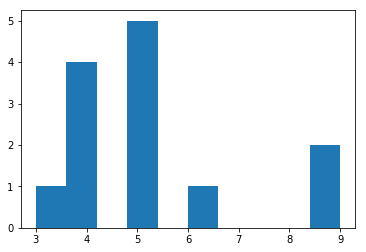

In [54]:
southwark_venues_count = southwark_venues.groupby('Neighborhood').count().reset_index()
southwark_venues_count = southwark_venues_count[['Neighborhood', 'Venue Category']]
southwark_venues_count.columns = ['Neighborhood', 'Venue Category Count']

plt.hist(southwark_venues_count['Venue Category Count'], bins =10)
plt.show()

The histogram shows a fairly distributed data, almost a normal distribution. 

# 5. Analyze Each Neighborhood

We will do one hot encoding to pivot category values into columns of the dataframe.
There is one observation that we have to be careful about: one of the category values is Neighborhood. After one hot encoding, this value will become a column name. We are already using the column Neighborhood to represent the neighborhood name. To avoid confusing these columns, we will rename the column that comes from one hot encoding as Neighborhood Category.

In [56]:
# one hot encoding
southwark_onehot = pd.get_dummies(southwark_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
southwark_onehot['Neighborhood'] = southwark_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [southwark_onehot.columns[-1]] + list(southwark_onehot.columns[:-1])
southwark_onehot = southwark_onehot[fixed_columns]

southwark_onehot.head()

,Neighborhood,Art Gallery,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Garden,Bike Trail,Bus Station,Café,...,Pier,Pizza Place,Platform,Pub,Soccer Field,Supermarket,Theater,Train Station,Turkish Restaurant,Warehouse Store
0,Bankside,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Bankside,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bankside,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bankside,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bankside,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
southwark_onehot.shape

(68, 46)

#### We will group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [58]:
southwark_grouped = southwark_onehot.groupby('Neighborhood').mean().reset_index()
southwark_grouped.head()

,Neighborhood,Art Gallery,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Garden,Bike Trail,Bus Station,Café,...,Pier,Pizza Place,Platform,Pub,Soccer Field,Supermarket,Theater,Train Station,Turkish Restaurant,Warehouse Store
0,Bankside,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.222222,0.0,0.0,0.0,0.111111
1,Bermondsey,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.2,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000
2,Camberwell,0.0,0.0,0.00,0.0,0.0,0.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000
3,Denmark Hill,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.5,0.00,0.000000,0.0,0.0,0.0,0.000000
4,Dulwich,0.0,0.0,0.25,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.0,0.000000


In [59]:
southwark_grouped.columns

Index(['Neighborhood', 'Art Gallery', 'Asian Restaurant', 'Athletics & Sports',
       'Bakery', 'Bar', 'Beer Garden', 'Bike Trail', 'Bus Station', 'Café',
       'Clothing Store', 'Construction & Landscaping', 'Convenience Store',
       'Dance Studio', 'English Restaurant', 'Factory', 'Fast Food Restaurant',
       'Fish & Chips Shop', 'Food & Drink Shop', 'Furniture / Home Store',
       'Garden', 'Grocery Store', 'Gym', 'Gym / Fitness Center',
       'Harbor / Marina', 'Home Service', 'Hotel', 'Indian Restaurant', 'Lake',
       'Miscellaneous Shop', 'Motorsports Shop', 'Museum', 'Other Repair Shop',
       'Park', 'Pet Store', 'Pharmacy', 'Pier', 'Pizza Place', 'Platform',
       'Pub', 'Soccer Field', 'Supermarket', 'Theater', 'Train Station',
       'Turkish Restaurant', 'Warehouse Store'],
      dtype='object')

In [60]:
num_top_venues = 5
for hood in southwark_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = southwark_grouped[southwark_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bankside----
                    venue  freq
0    Fast Food Restaurant  0.22
1             Supermarket  0.22
2         Warehouse Store  0.11
3          Clothing Store  0.11
4  Furniture / Home Store  0.11


----Bermondsey----
               venue  freq
0  Convenience Store   0.2
1              Hotel   0.2
2               Park   0.2
3               Pier   0.2
4    Harbor / Marina   0.2


----Camberwell----
                        venue  freq
0                  Bike Trail  0.25
1           Fish & Chips Shop  0.25
2  Construction & Landscaping  0.25
3                        Park  0.25
4                 Art Gallery  0.00


----Denmark Hill----
               venue  freq
0                Pub  0.50
1   Motorsports Shop  0.25
2  Fish & Chips Shop  0.25
3        Art Gallery  0.00
4          Pet Store  0.00


----Dulwich----
                  venue  freq
0  Gym / Fitness Center  0.25
1    Athletics & Sports  0.25
2          Soccer Field  0.25
3                  Park  0.25
4             Pet 

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [62]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = southwark_grouped['Neighborhood']

for ind in np.arange(southwark_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(southwark_grouped.iloc[ind, :], num_top_venues)

In [64]:

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bankside,Supermarket,Fast Food Restaurant,Warehouse Store,Furniture / Home Store,Pharmacy,Pet Store,Clothing Store,Construction & Landscaping,Food & Drink Shop,Fish & Chips Shop
1,Bermondsey,Park,Harbor / Marina,Hotel,Pier,Convenience Store,Construction & Landscaping,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Factory
2,Camberwell,Construction & Landscaping,Park,Fish & Chips Shop,Bike Trail,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Factory,English Restaurant
3,Denmark Hill,Pub,Fish & Chips Shop,Motorsports Shop,Warehouse Store,Construction & Landscaping,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Factory,English Restaurant
4,Dulwich,Gym / Fitness Center,Athletics & Sports,Soccer Field,Park,Construction & Landscaping,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Factory


# 6. Cluster the Neighborhoods

In [65]:
southwark_grouped.head()

,Neighborhood,Art Gallery,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Garden,Bike Trail,Bus Station,Café,...,Pier,Pizza Place,Platform,Pub,Soccer Field,Supermarket,Theater,Train Station,Turkish Restaurant,Warehouse Store
0,Bankside,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.222222,0.0,0.0,0.0,0.111111
1,Bermondsey,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.2,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000
2,Camberwell,0.0,0.0,0.00,0.0,0.0,0.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000
3,Denmark Hill,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.5,0.00,0.000000,0.0,0.0,0.0,0.000000
4,Dulwich,0.0,0.0,0.25,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.0,0.000000


In [66]:
# set number of clusters
kclusters = 5
southwark_grouped_clustering = southwark_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(southwark_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 4, 4, 1, 2, 0, 3, 0, 0, 1])

In [67]:

kmeans

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)

In [68]:
southwark_merged = southwark_borough
# add clustering labels
southwark_merged['Cluster Labels'] = kmeans.labels_

# merge Neighborhoods dataframe with Newham borough dataframe to add latitude/longitude for each neighborhood
southwark_merged = southwark_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

southwark_merged.head() # check the last columns!

,Borough,Neighborhood,Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Southwark,Bankside,TQ325795,51.5082,0.1001,2,Supermarket,Fast Food Restaurant,Warehouse Store,Furniture / Home Store,Pharmacy,Pet Store,Clothing Store,Construction & Landscaping,Food & Drink Shop,Fish & Chips Shop
1,Southwark,Bermondsey,TQ335795,51.4986,0.0757,4,Park,Harbor / Marina,Hotel,Pier,Convenience Store,Construction & Landscaping,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Factory
2,Southwark,Camberwell,TQ325767,51.4736,0.0912,4,Construction & Landscaping,Park,Fish & Chips Shop,Bike Trail,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Factory,English Restaurant
3,Southwark,Denmark Hill,TQ327760,51.4678,0.0902,1,Pub,Fish & Chips Shop,Motorsports Shop,Warehouse Store,Construction & Landscaping,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Factory,English Restaurant
4,Southwark,Dulwich,TQ345725,51.4457,0.0779,2,Gym / Fitness Center,Athletics & Sports,Soccer Field,Park,Construction & Landscaping,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Factory


In [69]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
y = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(y)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(southwark_merged['Latitude'], southwark_merged['Longitude'], southwark_merged['Neighborhood'], southwark_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [70]:
southwark_merged.loc[southwark_merged['Cluster Labels'] == 0, southwark_merged.columns[[1] + list(range(5, southwark_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,East Dulwich,0,Train Station,Pub,Platform,English Restaurant,Miscellaneous Shop,Warehouse Store,Construction & Landscaping,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant
7,Newington,0,Park,Pub,Lake,Pizza Place,Grocery Store,Bar,Bakery,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop
8,Nunhead,0,Gym,Bar,Indian Restaurant,Pizza Place,Grocery Store,Dance Studio,Garden,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop
12,Walworth,0,Grocery Store,Platform,Asian Restaurant,Bakery,Beer Garden,Bus Station,Dance Studio,Garden,Furniture / Home Store,Food & Drink Shop


In [71]:
southwark_merged.loc[southwark_merged['Cluster Labels'] == 1, southwark_merged.columns[[1] + list(range(5, southwark_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Denmark Hill,1,Pub,Fish & Chips Shop,Motorsports Shop,Warehouse Store,Construction & Landscaping,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Factory,English Restaurant
9,Peckham,1,Pub,Turkish Restaurant,Home Service,Warehouse Store,Convenience Store,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Factory


In [72]:
southwark_merged.loc[southwark_merged['Cluster Labels'] == 2, southwark_merged.columns[[1] + list(range(5, southwark_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bankside,2,Supermarket,Fast Food Restaurant,Warehouse Store,Furniture / Home Store,Pharmacy,Pet Store,Clothing Store,Construction & Landscaping,Food & Drink Shop,Fish & Chips Shop
4,Dulwich,2,Gym / Fitness Center,Athletics & Sports,Soccer Field,Park,Construction & Landscaping,Furniture / Home Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Factory
10,Rotherhithe,2,Gym / Fitness Center,Garden,Café,Art Gallery,Theater,Supermarket,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Factory
11,Surrey Quays,2,Gym / Fitness Center,Fast Food Restaurant,Factory,Café,Museum,Dance Studio,Convenience Store,Garden,Furniture / Home Store,Food & Drink Shop


In [73]:
southwark_merged.loc[southwark_merged['Cluster Labels'] == 3, southwark_merged.columns[[1] + list(range(5, southwark_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Elephant and Castle,3,Food & Drink Shop,Soccer Field,Other Repair Shop,Warehouse Store,Construction & Landscaping,Furniture / Home Store,Fish & Chips Shop,Fast Food Restaurant,Factory,English Restaurant


In [74]:
southwark_merged.loc[southwark_merged['Cluster Labels'] == 4, southwark_merged.columns[[1] + list(range(5, southwark_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bermondsey,4,Park,Harbor / Marina,Hotel,Pier,Convenience Store,Construction & Landscaping,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Factory
2,Camberwell,4,Construction & Landscaping,Park,Fish & Chips Shop,Bike Trail,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Factory,English Restaurant


#  7. Conclusion and Recommendation

After a thorough analysis we can conclude that the most apppropriate location to setup up an African Restaurant would be in the first cluster (Cluster 0). Firstly,  it is evident that there are no restaurants catering for the African community in the neighborhood. As a matter of fact there are no African Restaurants in the vicinity. As indicated in the research, Southwark has the highest number of residents of African origin and that the employment rate is fairly high for minorities. 

The research has partially satified the requirements of management as indicated in the preamble. In the preamble we indicated that management want the follwoing conditions meant for establishing a restarant:
    * The identified location must not be close to other African restaurants, 
    * The location must be near or close to African communities, 
    * The location must be in the most secure areas, 
    * The Location must be family friendly, 
    * Easy access to the location by public and private transport
The first two conditions are the most crucial considerations and have been meant. The last are easy to establish, although for lack of time we did not investigate how secure the neighborhood are. Access to good transport is implied in the findings as most of the areas  have bus stations or train as being some of the most frquented places. 

However, there are other factors that may be required in order to assist mamangement to come up with a decision. Our findings should therefore be used in conjunction with other information. Consideration such as cost of renting a premises for a restaurant should be considered. 

